In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
import re, string
from nltk.corpus import stopwords

# **Loading** **Dataset**

In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Dataset/3. Aggressive_All.csv")
df1['label']=1
df1.head(10)

,No.,Message,label
0,1,zhha Islam does nothing but freeze the status ...,1
1,2,You dont get out much do you,1
2,3,MaxBlumenthal Campagnebds Blumenthal self prom...,1
3,4,No silly it isnt ITS UR MOMS and might I say q...,1
4,5,Yes there is even more rape in Muslim countrie...,1
5,6,I think that you are so sexy and hot and sexy ...,1
6,7,hey shithead quit fucking with all the ufc p...,1
7,8,WOW you suck cock You upset me so much with yo...,1
8,9,Hahaha you dont actually believe this bullshit...,1
9,10,czechofile is worse than a pedophile czechof...,1


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/Dataset/4. Non_Aggressive_All.csv")
df2['label']=0
df2.head(10)

,No.,Message,label
0,1,Libya casualty report French operations You ...,0
1,2,Just for the record that IP is blocked for ho...,0
2,3,Big Brother Australia I see you have partial...,0
3,4,WikipediaFeatured portal candidatesPortalOrgan...,0
4,5,wiki cant edit could you make Thai airways s...,0
5,6,IMrTrippy That you havent grasped that Humanit...,0
6,7,Yes theres no problem with leaving it in a par...,0
7,8,It seems to be your hobby to look around if so...,0
8,9,Orange and Pomegranate limited edition The ar...,0
9,10,The fact that you cant at present get your own...,0


In [ ]:
df = pd.concat([df1,df2])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237656 entries, 0 to 118827
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   No.      237656 non-null  int64 
 1   Message  237585 non-null  object
 2   label    237656 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 7.3+ MB


In [ ]:
df

,No.,Message,label
0,1,zhha Islam does nothing but freeze the status ...,1
1,2,You dont get out much do you,1
2,3,MaxBlumenthal Campagnebds Blumenthal self prom...,1
3,4,No silly it isnt ITS UR MOMS and might I say q...,1
4,5,Yes there is even more rape in Muslim countrie...,1
...,...,...,...
118823,118824,VANDALIZER Hi this is your official warning ...,0
118824,118825,Its kinda both really,0
118825,118826,This is very nonnotable as related to the arch...,0
118826,118827,no i just randomly made up some pairs,0


In [ ]:
df.drop(columns=['No.'], axis=1, inplace=True)

# **Preprocessing** **and** **Visualization**

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string

In [ ]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm',
                  'im', 'll', 'y', 've', 'u', 'ur', 'don',
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat',
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like'])
stemmer = SnowballStemmer('english')
def clean_text(text):

    # Remove Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())

    # Make all text lowercase
    text = text.lower()

    # Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])

    # Removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)

    # Removing stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['Message'] = df['Message'].fillna('')
df['cleaned_text'] = df['Message'].apply(lambda text: clean_text(text))

In [ ]:
df.head()

,Message,label,cleaned_text
0,zhha Islam does nothing but freeze the status ...,1,zhha islam doe noth freez status women th centuri
1,You dont get out much do you,1,dont get much
2,MaxBlumenthal Campagnebds Blumenthal self prom...,1,maxblumenth campagnebd blumenth self promot on...
3,No silly it isnt ITS UR MOMS and might I say q...,1,silli isnt mom might say quit love page inde o...
4,Yes there is even more rape in Muslim countrie...,1,yes even rape muslim countri report


In [ ]:
df.isnull().sum()

Message         0
label           0
cleaned_text    0
dtype: int64

In [ ]:
df['cleaned_text'].duplicated().sum()

107248

In [ ]:
df.drop_duplicates("cleaned_text", inplace = True)

In [ ]:
df['cleaned_text'].str.isspace().sum()

0

In [ ]:
df['label'].value_counts()

label
0    93326
1    37082
Name: count, dtype: int64

In [ ]:
# Plotting the top 15 words for each label
import plotly.express as px
for cyber_type in df.label.unique():

    top50_word = df.cleaned_text[df.label==cyber_type].str.split(expand=True).stack().value_counts()[:15]

    fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
    fig.update_traces(marker_color='red')
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    fig.update_layout(title=f"Top 15 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()

# **Splitting the datset**

In [ ]:
X = df['cleaned_text']  # Feature (raw data)
y = df['label']  # Target Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(104326,)
(104326,)
(26082,)
(26082,)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=50000)

# Fit TF-IDF Vectorizer and transform the training text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
print(X_train_tfidf)

  (0, 593)	0.2599039659240582
  (0, 2256)	0.33975529406208127
  (0, 19328)	0.479646427904554
  (0, 13086)	0.1740775115539391
  (0, 44704)	0.39160474519662064
  (0, 24018)	0.34433349025543547
  (0, 6045)	0.3264159297517241
  (0, 39767)	0.1600805222684498
  (0, 31032)	0.22280520329474987
  (0, 44660)	0.32080753175492494
  (1, 46970)	0.16928800404851987
  (1, 17135)	0.15575297544313285
  (1, 44494)	0.12512602110717105
  (1, 12465)	0.2284105218108235
  (1, 46829)	0.22869618371568273
  (1, 15942)	0.11135598538765935
  (1, 46879)	0.11745702311189879
  (1, 2779)	0.08857697687797203
  (1, 11994)	0.10192918189265646
  (1, 8663)	0.25310053453014975
  (1, 46531)	0.1694452226489043
  (1, 37526)	0.21857288068078404
  (1, 18081)	0.14814751630392672
  (1, 38826)	0.2159914334342972
  (1, 8274)	0.2151080230319118
  :	:
  (104325, 8221)	0.07166010108943187
  (104325, 25829)	0.045698368968621894
  (104325, 14248)	0.018272924924705024
  (104325, 19792)	0.044095774608392556
  (104325, 41389)	0.020174897260

In [ ]:
print(X_test_tfidf)

  (0, 48364)	0.07174227070044532
  (0, 45171)	0.16950430319437335
  (0, 42598)	0.4785070761531946
  (0, 41400)	0.38981271795531164
  (0, 38507)	0.08308157179490927
  (0, 35910)	0.1943345171835184
  (0, 33171)	0.0986589909571535
  (0, 31237)	0.053727706343822006
  (0, 28920)	0.0609205303822098
  (0, 27415)	0.12606659598087283
  (0, 25829)	0.05131726967141668
  (0, 25130)	0.08915230469016729
  (0, 21959)	0.1236653361467133
  (0, 21255)	0.3193239039125041
  (0, 21246)	0.19703431011608633
  (0, 21123)	0.3341987252284133
  (0, 17456)	0.1738702614738899
  (0, 16423)	0.09641143448595586
  (0, 14681)	0.10557966164959995
  (0, 13498)	0.2558168169713354
  (0, 12925)	0.09160642953681765
  (0, 10146)	0.09851715505804316
  (0, 9194)	0.0999600849007364
  (0, 9050)	0.09644218693972077
  (0, 8280)	0.08462534794439112
  :	:
  (26080, 24155)	0.1449080124976435
  (26080, 11392)	0.36542046769765396
  (26080, 8718)	0.1187657829654698
  (26080, 8584)	0.11505520302426027
  (26080, 2944)	0.1109891550055045
  

In [ ]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [ ]:
display_scores(tfidf_vectorizer,X_train_tfidf)

articl                                             Score: 2123.0795924520858
page                                               Score: 1944.8805993200335
edit                                               Score: 1673.2141960025656
dont                                               Score: 1430.0602185235234
pleas                                              Score: 1336.0905992065798
wikipedia                                          Score: 1328.8945121511165
thank                                              Score: 1308.676335869723
one                                                Score: 1205.8119726279172
use                                                Score: 1151.9005954802778
would                                              Score: 1127.9924416285612
think                                              Score: 1104.346104611334
know                                               Score: 1095.5983463439632
fuck                                               Score: 1088.5813873514824
g

# **Model Training** **and** **Evaluation**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import lightgbm as lgb

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Stochastic Gradient Descent": SGDClassifier(loss='log'),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": MultinomialNB(),
    "LightGBM": lgb.LGBMClassifier()
}

# Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.86833831761368
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     18557
           1       0.84      0.67      0.75      7525

    accuracy                           0.87     26082
   macro avg       0.86      0.81      0.83     26082
weighted avg       0.87      0.87      0.86     26082



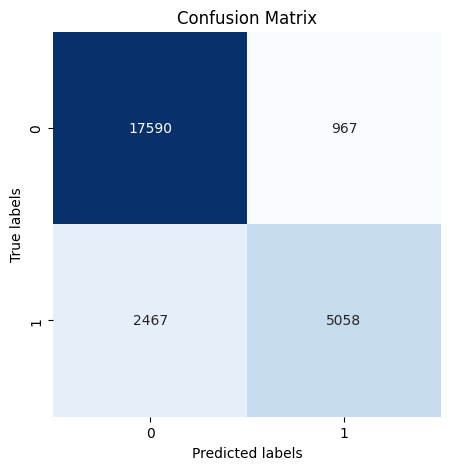

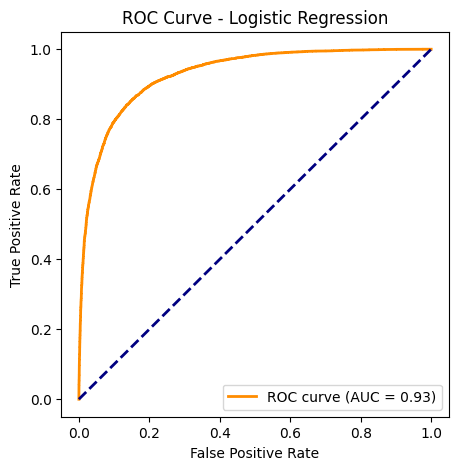

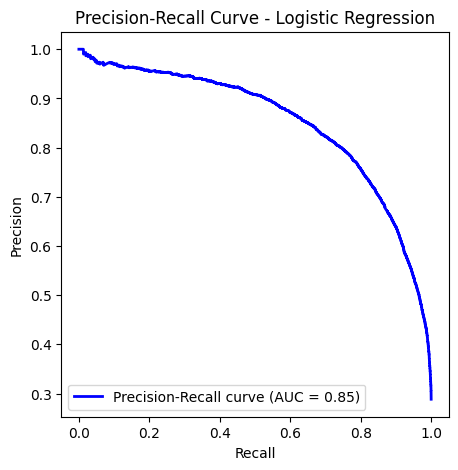

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Evaluate the performance of the LR model on test data
lr_metrics = evaluate_model(lr_model, X_test_tfidf, y_test)

# SGD Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



Accuracy: 0.8439920251514454
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     18557
           1       0.87      0.54      0.67      7525

    accuracy                           0.84     26082
   macro avg       0.85      0.75      0.78     26082
weighted avg       0.85      0.84      0.83     26082



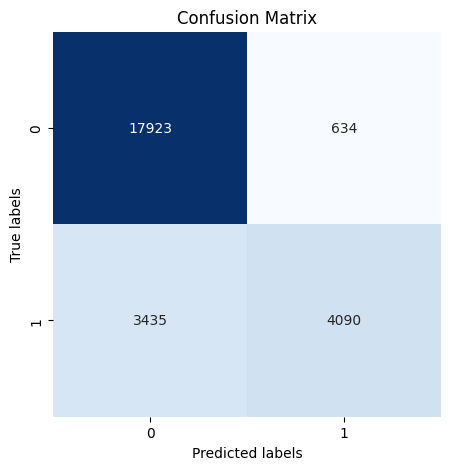

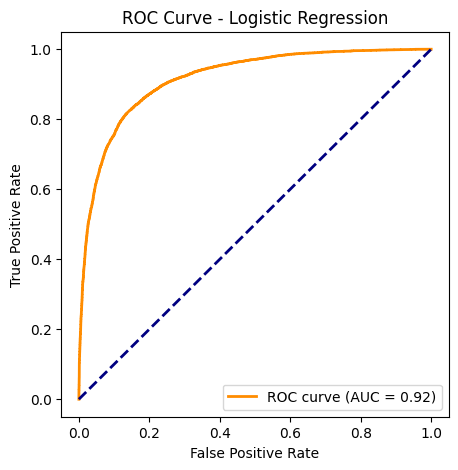

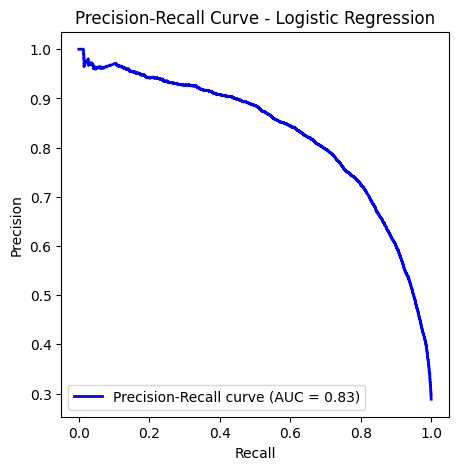

In [ ]:
sgd_model = SGDClassifier(loss='log')
sgd_model.fit(X_train_tfidf, y_train)

sgd_metrics = evaluate_model(sgd_model, X_test_tfidf, y_test)

# AdaBoostClassifier

Accuracy: 0.8233264320220842
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89     18557
           1       0.83      0.49      0.61      7525

    accuracy                           0.82     26082
   macro avg       0.83      0.72      0.75     26082
weighted avg       0.82      0.82      0.81     26082



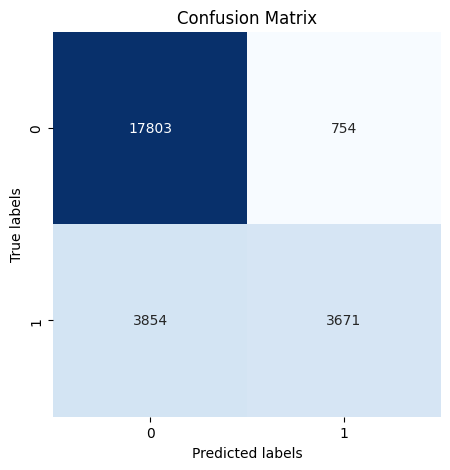

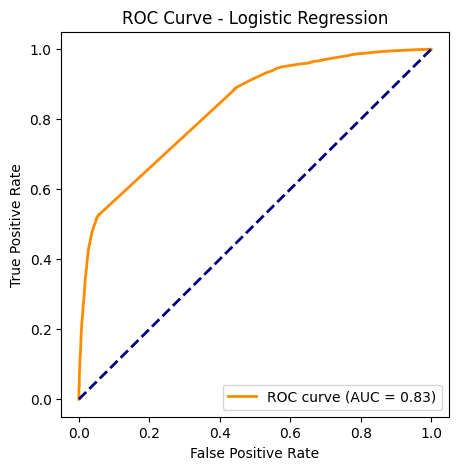

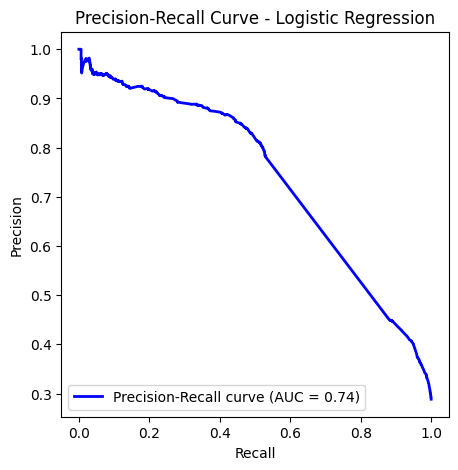

In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_tfidf, y_train)

ada_metrics = evaluate_model(ada_model, X_test_tfidf, y_test)

# Multinomial NB

Accuracy: 0.8567211103442988
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18557
           1       0.82      0.65      0.72      7525

    accuracy                           0.86     26082
   macro avg       0.84      0.79      0.81     26082
weighted avg       0.85      0.86      0.85     26082



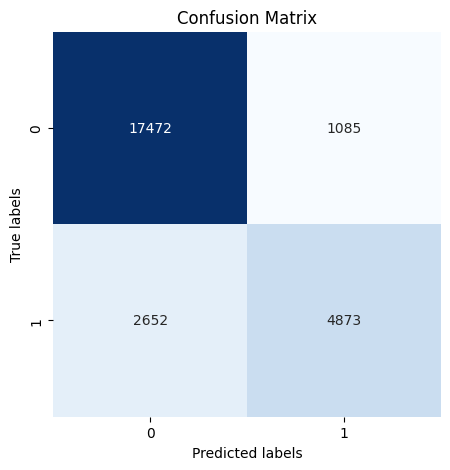

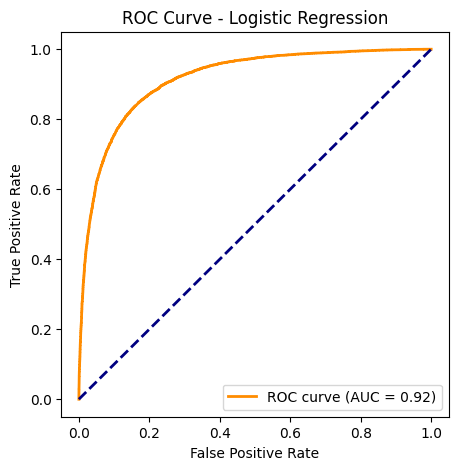

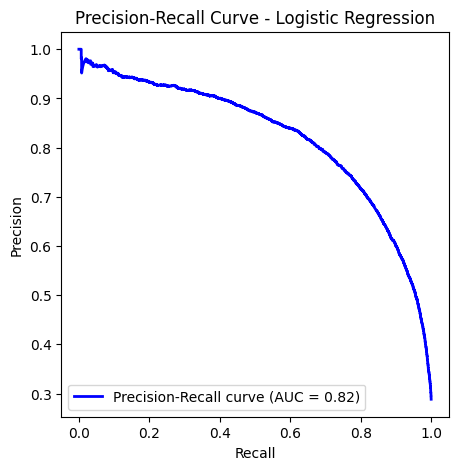

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_metrics = evaluate_model(nb_model, X_test_tfidf, y_test)

# LGBM Classifier

In [ ]:
#lgbm_model = lgb.LGBMClassifier()
#lgbm_model.fit(X_train_tfidf, y_train)

#lgbm_metrics = evaluate_model(lgbm_model, X_test_tfidf, y_test)

Training Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8709838202591825
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     18557
           1       0.85      0.67      0.75      7525

    accuracy                           0.87     26082
   macro avg       0.86      0.81      0.83     26082
weighted avg       0.87      0.87      0.87     26082

Precision: 0.8474774473772135
Recall: 0.6741528239202658
F1 Score: 0.7509436755236475



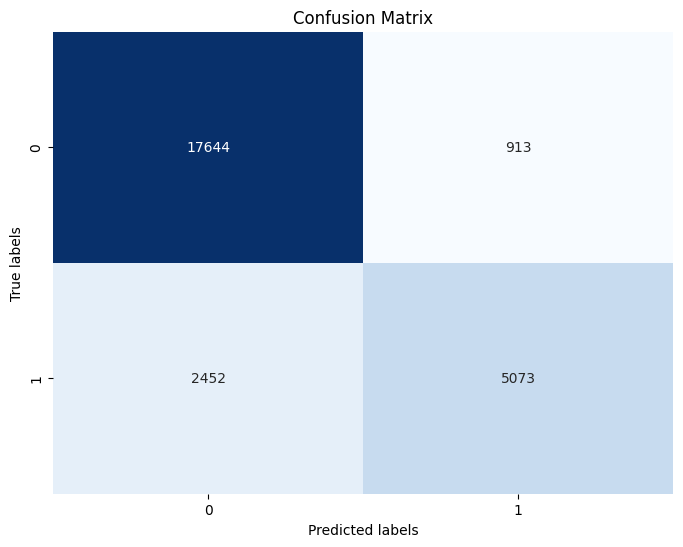

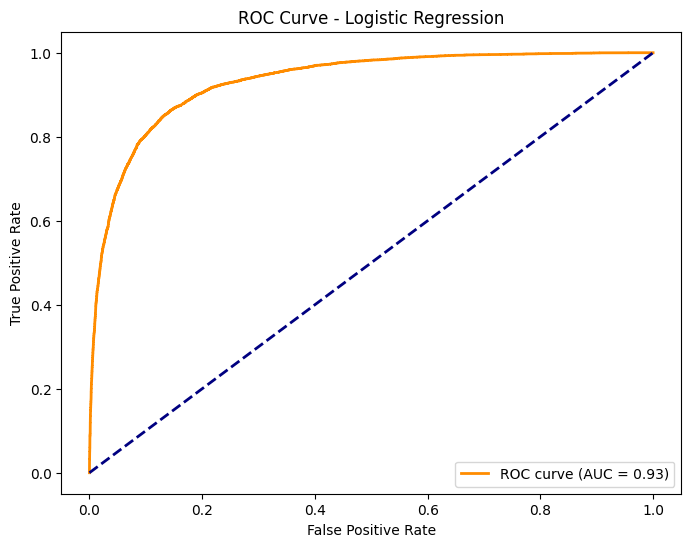

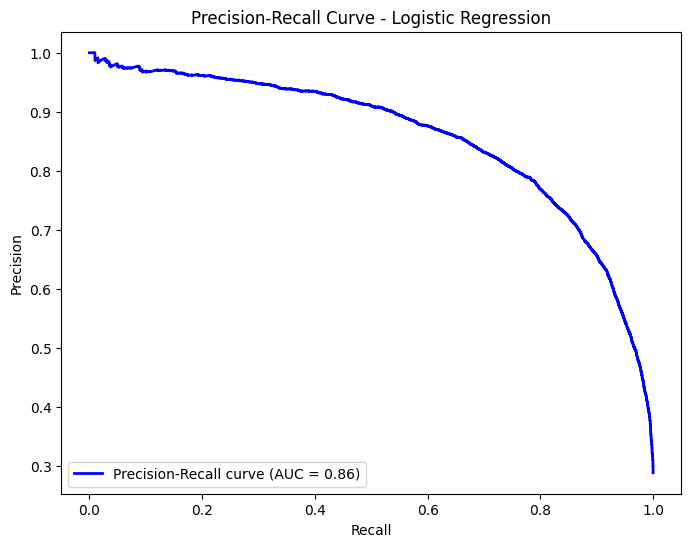

-------------------------------------------------------
Training Stochastic Gradient Descent


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Accuracy: 0.8414232037420443
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     18557
           1       0.87      0.53      0.66      7525

    accuracy                           0.84     26082
   macro avg       0.85      0.75      0.78     26082
weighted avg       0.85      0.84      0.83     26082

Precision: 0.8692525604706908
Recall: 0.5300996677740863
F1 Score: 0.6585768532276703



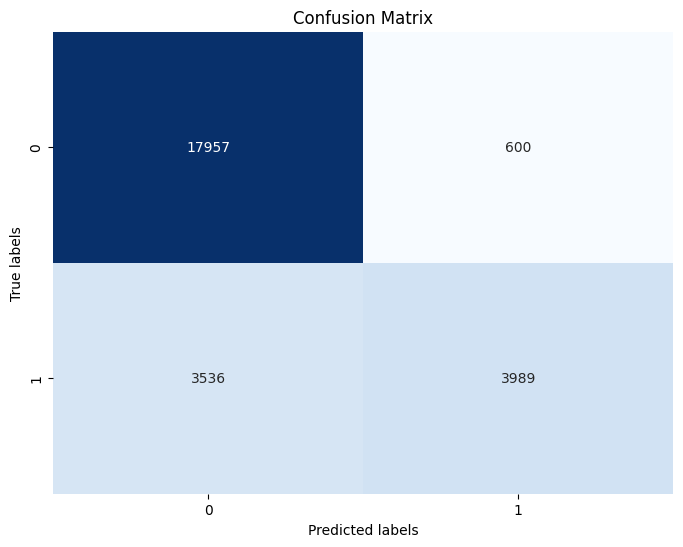

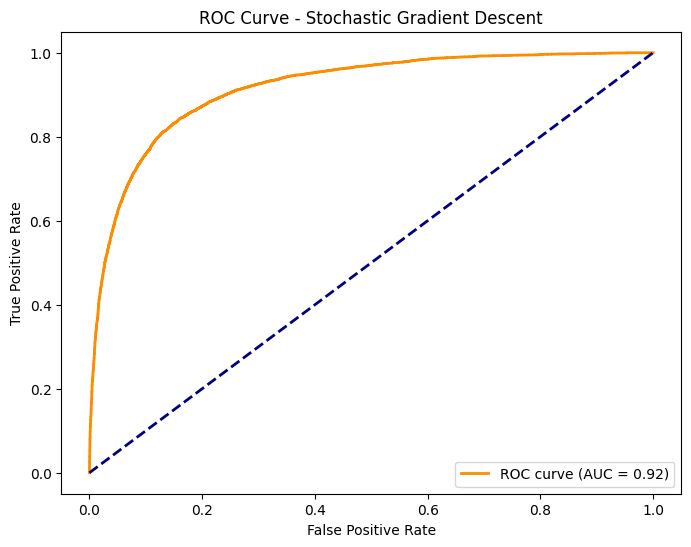

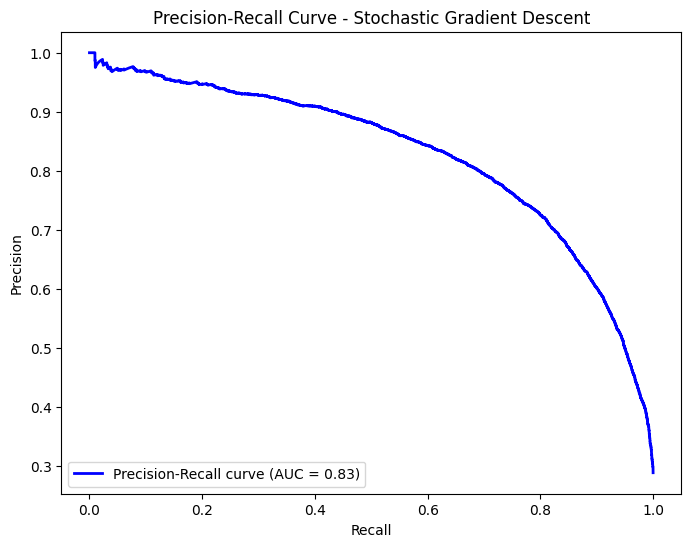

-------------------------------------------------------
Training AdaBoost
Accuracy: 0.8208342918487846
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88     18557
           1       0.83      0.48      0.61      7525

    accuracy                           0.82     26082
   macro avg       0.82      0.72      0.74     26082
weighted avg       0.82      0.82      0.80     26082

Precision: 0.8297872340425532
Recall: 0.4768106312292359
F1 Score: 0.6056207274875517



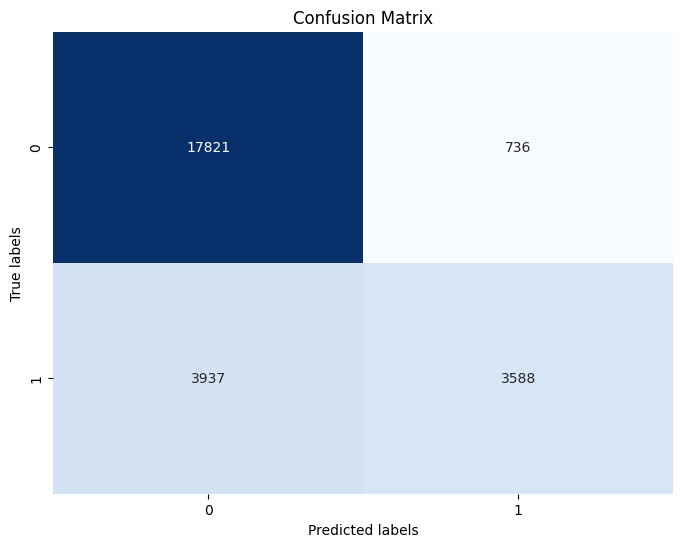

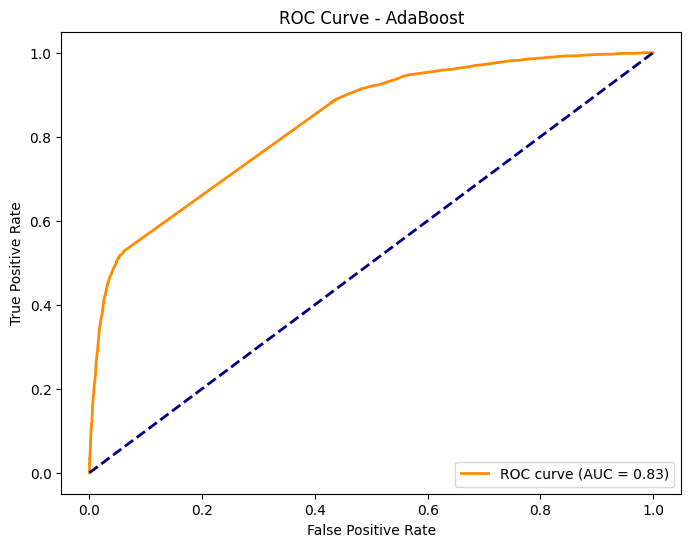

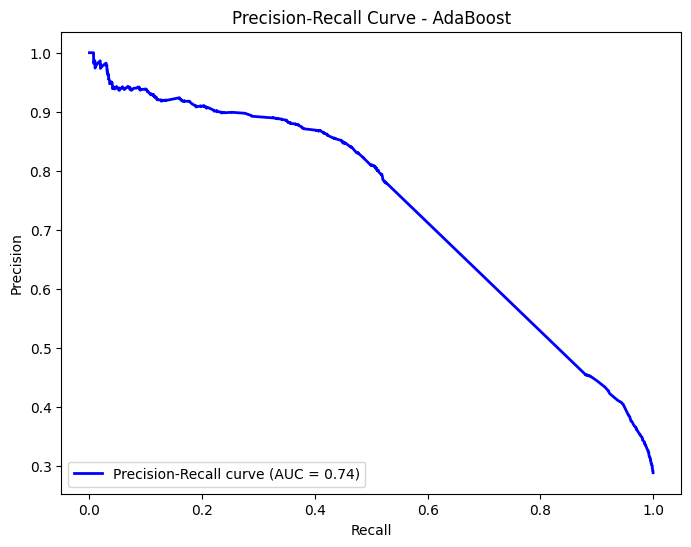

-------------------------------------------------------
Training Naive Bayes
Accuracy: 0.8465225059427958
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     18557
           1       0.86      0.56      0.68      7525

    accuracy                           0.85     26082
   macro avg       0.85      0.76      0.79     26082
weighted avg       0.85      0.85      0.84     26082

Precision: 0.8592411260709915
Recall: 0.5597342192691029
F1 Score: 0.6778788122636195



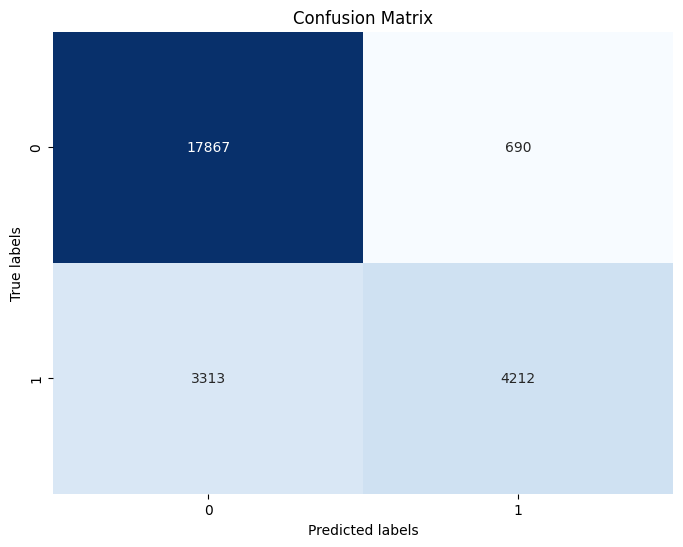

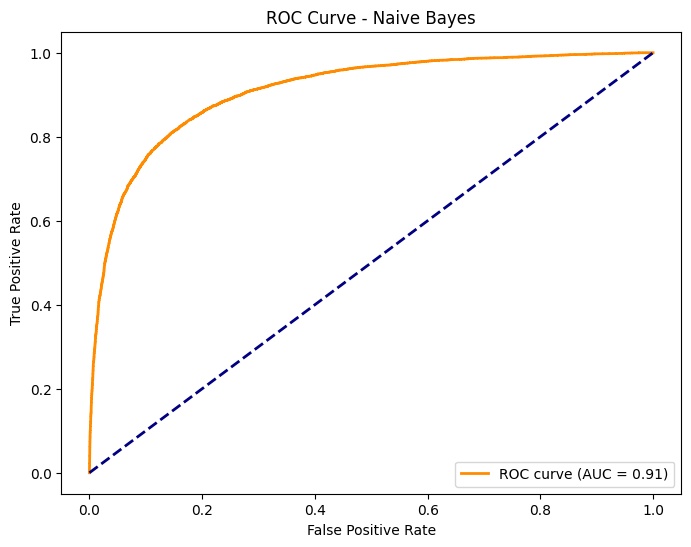

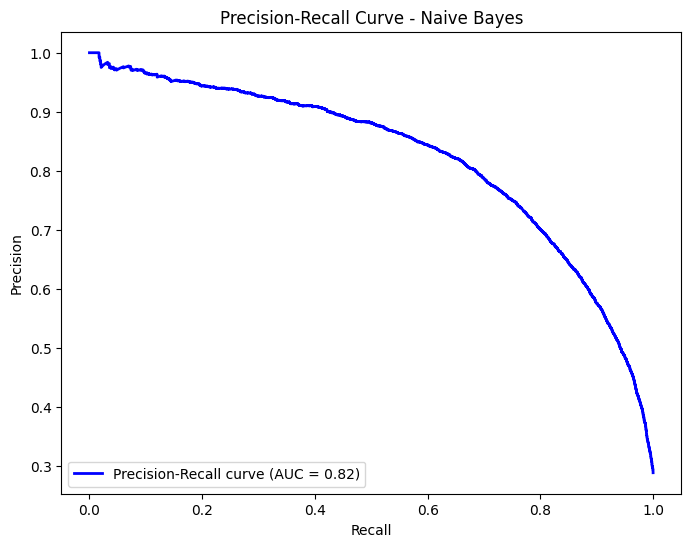

-------------------------------------------------------
Training LightGBM
[LightGBM] [Info] Number of positive: 29557, number of negative: 74769
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 18.247354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436355
[LightGBM] [Info] Number of data points in the train set: 104326, number of used features: 7700
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.283314 -> initscore=-0.928083
[LightGBM] [Info] Start training from score -0.928083
Accuracy: 0.8539222452265931
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     18557
           1       0.85      0.60      0.70      7525

    accuracy                           0.85     26082
   macro avg       0.85      0.78      0.80     26082
weighted avg       0.85      0.85     

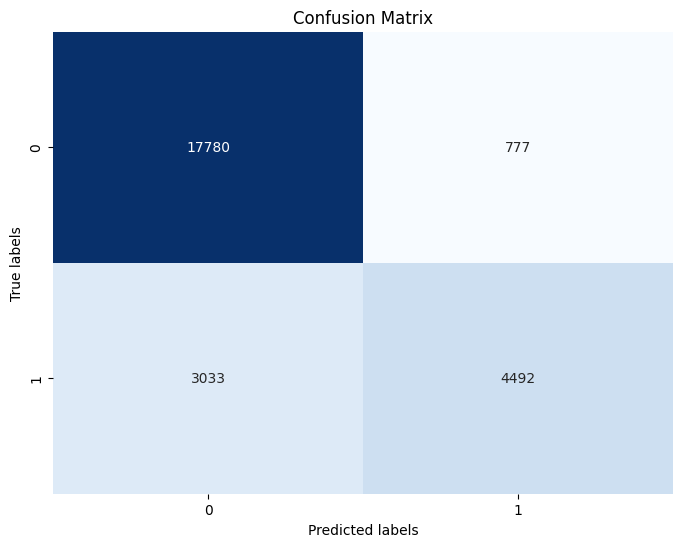

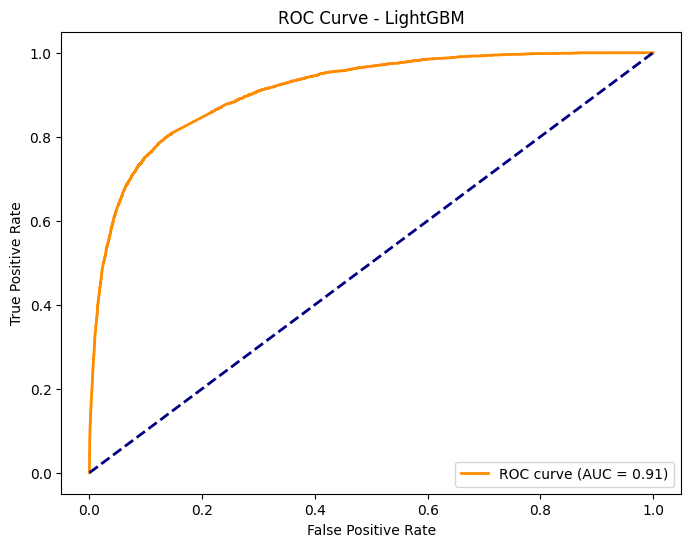

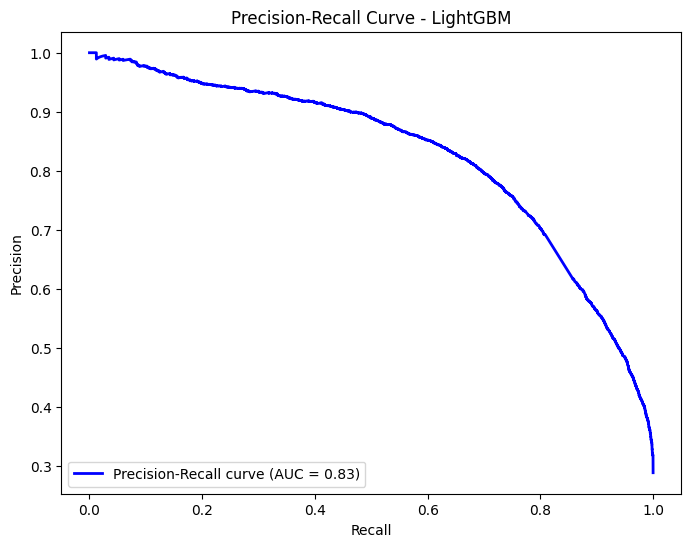

-------------------------------------------------------


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

def evaluate_models(models, X_test, y_test):
    metrics_results = {}

    for name, model in models.items():
        print("Training", name)
        model.fit(X_train_tfidf, y_train)

        # Predict on test data
        y_pred = model.predict(X_test_tfidf)
        y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]  # Probability estimates for positive class

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        cls_report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        pr_auc = auc(recall, precision)

         # Calculate and display precision, recall, and F1-score
        precision1 = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[0][1])
        recall1 = conf_matrix[1][1] / (conf_matrix[1][1] + conf_matrix[1][0])
        f1_score = 2 * (precision1 * recall1) / (precision1 + recall1)

        # Store evaluation metrics in a dictionary
        metrics_results[name] = {
            "Accuracy": accuracy,
            "Classification Report": cls_report,
            "Confusion Matrix": conf_matrix,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
            "Precision": precision1,
            "Recall": recall1,
            "F1_score": f1_score
        }

        # Print evaluation metrics
        print("Accuracy:", accuracy)
        print("Classification Report:")
        print(cls_report)




        print("Precision:", precision1)
        print("Recall:", recall1)
        print("F1 Score:", f1_score)
        print()

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.show()

        # Plot ROC curve
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve - ' + name)
        plt.legend(loc="lower right")
        plt.show()

        # Plot Precision-Recall curve
        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve - ' + name)
        plt.legend(loc="lower left")
        plt.show()

        print("-------------------------------------------------------")

    return metrics_results

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Stochastic Gradient Descent": SGDClassifier(loss='log'),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": MultinomialNB(),
    "LightGBM": lgb.LGBMClassifier()
}
# Evaluate models
results = evaluate_models(models, X_test_tfidf, y_test)


In [ ]:
data = {
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision1,
    'Recall': recall1,
    'F1 Score': f1_scores
}

df = pd.DataFrame(data)
df_sorted = df.sort_values(by='F1 Score', ascending=False)

# Display the sorted DataFrame as a table
print(df_sorted)


                         Model  Accuracy  Precision    Recall  F1 Score
0          Logistic Regression  0.870984   0.847477  0.674153  0.750944
4                     LightGBM  0.853922   0.852534  0.596944  0.702204
3                  Naive Bayes  0.846523   0.859241  0.559734  0.677879
1  Stochastic Gradient Descent  0.841423   0.869253  0.530100  0.658577
2                     AdaBoost  0.820834   0.829787  0.476811  0.605621


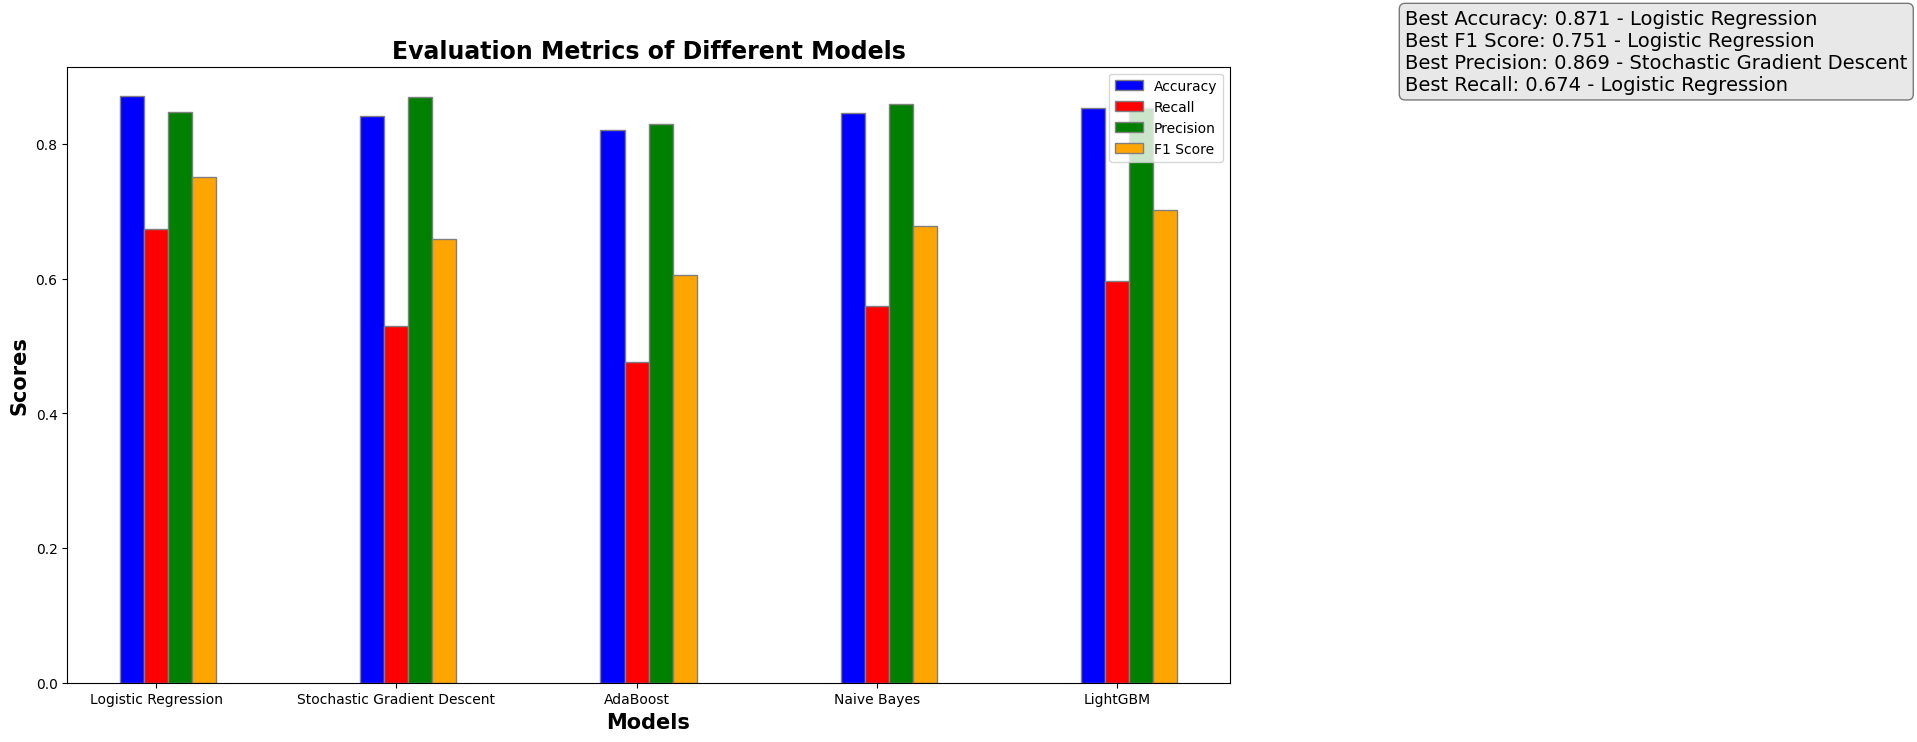

<Figure size 640x480 with 0 Axes>

In [ ]:
# Extract evaluation results
model_names = list(results.keys())
metrics = list(results[model_names[0]].keys())

# Initialize arrays to store metric values
accuracy_scores = []
precision1 = []
recall1 = []
f1_scores = []

# Iterate over models and extract metric values
for name in model_names:
    accuracy_scores.append(results[name]["Accuracy"])
    precision1.append(results[name]["Precision"])
    recall1.append(results[name]["Recall"])
    f1_scores.append(results[name]["F1_score"])
# Set width of bar
barWidth = 0.10

# Set position of bar on X axis
r1 = np.arange(len(model_names))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create bars for each metric
plt.figure(figsize=(15,8))
plt.bar(r1, accuracy_scores, color='b', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, recall1, color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, precision1, color='g', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r4, f1_scores, color='orange', width=barWidth, edgecolor='grey', label='F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.ylabel('Scores', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth for r in range(len(model_names))], model_names)
plt.title('Evaluation Metrics of Different Models', fontweight='bold', fontsize=17)

# Add text annotations for best scores
best_accuracy_model = model_names[np.argmax(accuracy_scores)]
best_recall_model = model_names[np.argmax(recall1)]
best_precision_model = model_names[np.argmax(precision1)]
best_f1_model = model_names[np.argmax(f1_scores)]

plt.legend()
textstr = '\n'.join([
    'Best Accuracy: {:.3f} - {}'.format(max(accuracy_scores), best_accuracy_model),
    'Best F1 Score: {:.3f} - {}'.format(max(f1_scores), best_f1_model),
    'Best Precision: {:.3f} - {}'.format(max(precision1), best_precision_model),
    'Best Recall: {:.3f} - {}'.format(max(recall1), best_recall_model)
])

# Define properties for the text box
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

# Place a text box

plt.text(5.3, 1, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

# Show the plot
plt.show()
plt.tight_layout()
plt.show()



# Random Forest

In [ ]:
#rf_model =RandomForestClassifier()
#rf_model.fit(X_train_tfidf, y_train)

#rf_metrics = evaluate_model(rf_model, X_test_tfidf, y_test)

# SVM

In [ ]:
#svm_model = SVC(probability=True)
#svm_model.fit(X_train_tfidf, y_train)

#svm_metrics = evaluate_model(svm_model, X_test_tfidf, y_test)

# **Pipeline Creation**

In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('tfidf', TfidfVectorizer(max_features=5000)),('adaboost_model', AdaBoostClassifier())])

pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('adaboost_model', AdaBoostClassifier())])

In [ ]:
pipe.predict(["@abc Hey man! Great match today. Your smashes were spot on. Let's continue playing together. \
               #badminton #brotherhood #men #doubles"])

array([0])

In [ ]:
pipe.predict(["@abc Man you don't have any facial hair. You look like a fucking 9 year old school boy! #clown #idiot"])

array([1])